<a href="https://colab.research.google.com/github/MattWong-ca/30110-digital-systems-lab/blob/main/verilog-git-homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [ ]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter(
    input clk,
    input rst,
    output reg [3:0] count,
    output reg ten
);

//YOUR CODE HERE
always @(posedge clk or posedge rst) begin
    if (rst) begin
        count <= 4'b0000;
        ten <= 1'b0;
    end else begin
        if (count == 4'b1001) begin
            count <= 4'b0000;
            ten <= 1'b1;
        end else begin
            count <= count + 1'b1;
            ten <= 1'b0;
        end
    end
end

endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [3:0]count;
wire ten;

decade_counter decade_counter_u0(
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

always begin

    //YOUR CODE HERE - Generate 20 unit time clock;
    #10 clk = ~clk;
end

initial begin

    //YOUR CODE HERE - Initialize the clk, rst;
    $dumpfile("decade_counter.vcd");
    $dumpvars(0, decade_counter_tb);
    clk = 0;
    rst = 1;
    #30 rst = 0;
    #200 $finish;
end

endmodule


VCD info: dumpfile decade_counter.vcd opened for output.



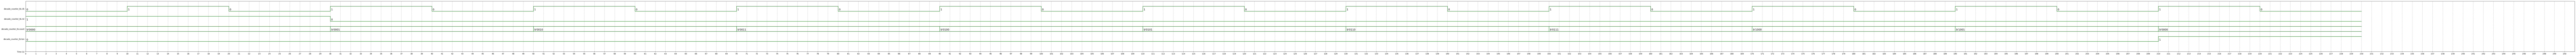

In [ ]:
%%waveform decade_counter.vcd
sign_list = ['decade_counter_tb.clk', 'decade_counter_tb.rst', 'decade_counter_tb.count', 'decade_counter_tb.ten']
time_begin = 0
time_end = 250
base = 'bin'

6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

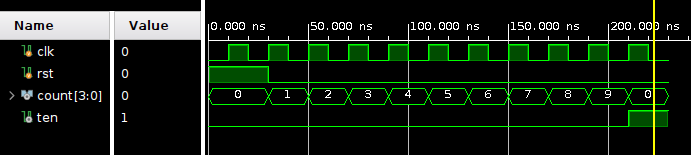

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [ ]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module multiplexer(
    input [1:0]A,
    input [1:0]B,
    input [1:0]C,
    input [1:0]D,
    input [1:0]SEL,
    output reg [1:0]X
);

//YOUR CODE HERE
//TIPS: IN THE VERILOG CASE STATEMENT, YOU HAVE TO LIST ALL CONDITION TO AVIOD ANY AMBIGUOUS STATEMENT;
  always @ (A, B, C, D, SEL) begin
        case (SEL)
            2'b00: X = A;  // If SEL is 00, X = A
            2'b01: X = B;  // If SEL is 01, X = B
            2'b10: X = C;  // If SEL is 10, X = C
            2'b11: X = D;  // If SEL is 11, X = D
            default: X = 2'b00;  // Default case (though SEL will never be anything else)
        endcase
  end
endmodule

//TESTBENCH HERE
module testbench;

    // Declare inputs as reg and outputs as wire
    reg [1:0] A, B, C, D, SEL;
    wire [1:0] X;

    // Instantiate the multiplexer module
    multiplexer uut (
        .A(A),
        .B(B),
        .C(C),
        .D(D),
        .SEL(SEL),
        .X(X)
    );

    // Test stimulus block
    initial begin
        $dumpfile("multiplexer.vcd");
        $dumpvars(0, testbench);

        // Display the header for output
        $display("SEL  A   B   C   D   |  X");
        $display("--------------------------");

        // Test all possible values for SEL
        A = 2'b00; B = 2'b01; C = 2'b01; D = 2'b11;

        // Apply different SEL combinations
        SEL = 2'b00; #10;  // Test SEL = 00, expect X = A
        $display("%b   %b  %b  %b  %b  |  %b", SEL, A, B, C, D, X);

        SEL = 2'b01; #10;  // Test SEL = 01, expect X = B
        $display("%b   %b  %b  %b  %b  |  %b", SEL, A, B, C, D, X);

        SEL = 2'b10; #10;  // Test SEL = 10, expect X = C
        $display("%b   %b  %b  %b  %b  |  %b", SEL, A, B, C, D, X);

        SEL = 2'b11; #10;  // Test SEL = 11, expect X = D
        $display("%b   %b  %b  %b  %b  |  %b", SEL, A, B, C, D, X);

        $finish;
    end
endmodule


VCD info: dumpfile multiplexer.vcd opened for output.
SEL  A   B   C   D   |  X
--------------------------
00   00  01  01  11  |  00
01   00  01  01  11  |  01
10   00  01  01  11  |  01
11   00  01  01  11  |  11



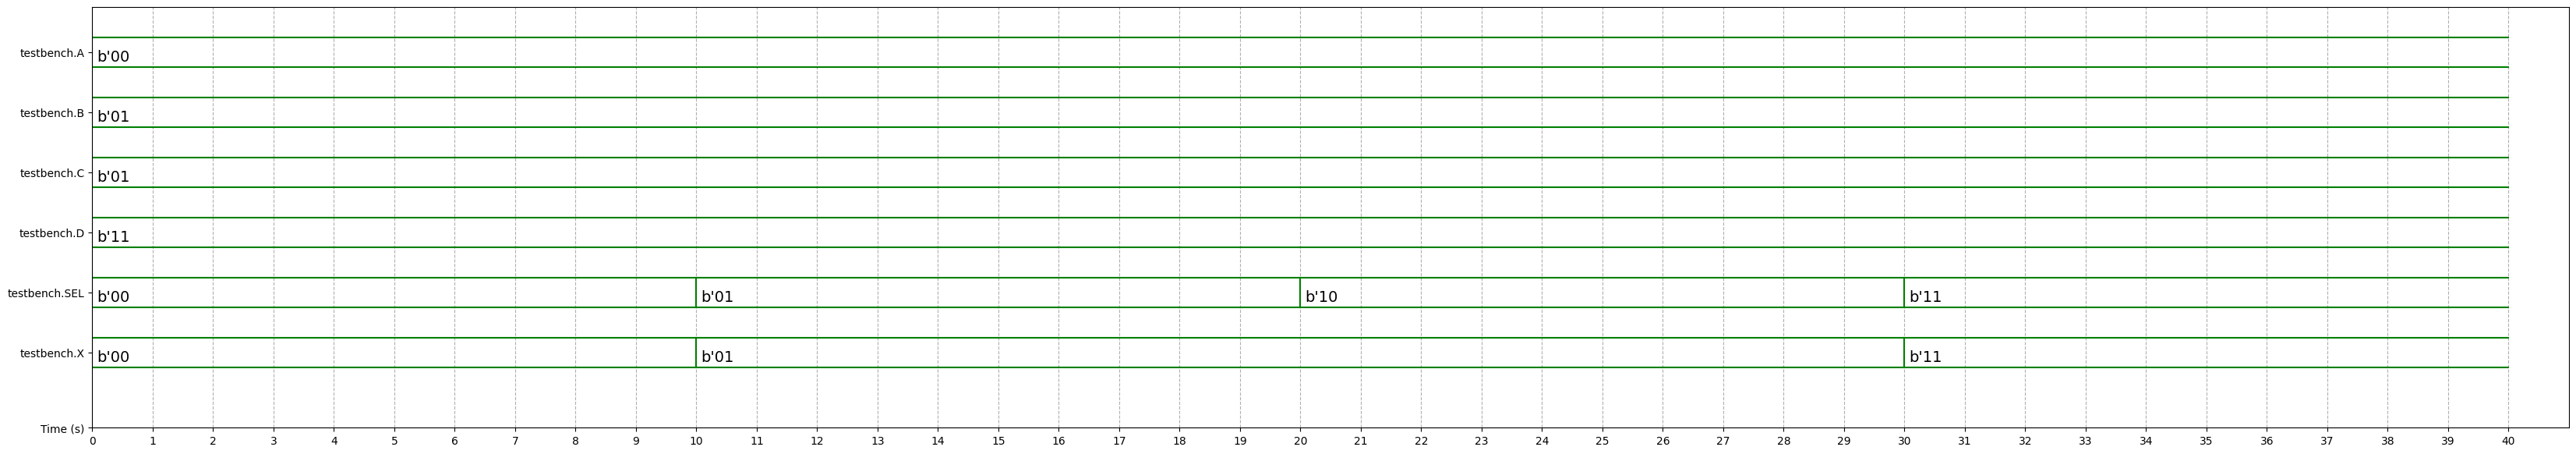

In [ ]:
%%waveform multiplexer.vcd
sign_list = ['testbench.A', 'testbench.B', 'testbench.C', 'testbench.D', 'testbench.SEL', 'testbench.X']
time_begin = 0
time_end = 40
base = 'bin'

5. Here is a demo testbench result for the multiplexer;

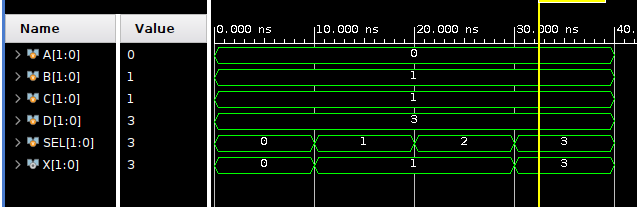

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [ ]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module demultiplexer(
    input [1:0]A,
    input [1:0]SEL,
    output reg [1:0] W,
    output reg [1:0] X,
    output reg [1:0] Y,
    output reg [1:0] Z
    );

//YOUR CODE HERE
  always @(*) begin
        // Default all outputs to 0
        W = 2'b00;
        X = 2'b00;
        Y = 2'b00;
        Z = 2'b00;

        case (SEL)
            2'b00: W = A;
            2'b01: X = A;
            2'b10: Y = A;
            2'b11: Z = A;
            default: ;
        endcase
  end
endmodule

//TESTBENCH HERE
module demultiplexer_tb;
    reg [1:0] A;
    reg [1:0] SEL;
    wire [1:0] W, X, Y, Z;

    demultiplexer uut (
        .A(A),
        .SEL(SEL),
        .W(W),
        .X(X),
        .Y(Y),
        .Z(Z)
    );

    initial begin
        $dumpfile("demultiplexer.vcd");
        $dumpvars(0, demultiplexer_tb);

        $monitor("Time=%0t | A=%b | SEL=%b | W=%b | X=%b | Y=%b | Z=%b", $time, A, SEL, W, X, Y, Z);

        // Test cases
        A = 2'b00; // Initial value: A = 0
        SEL = 2'b00; #10; // First 10 time units

        A = 2'b01; // Change A to 1
        SEL = 2'b01; #10; // Next 20 time units

        A = 2'b01; // Change A to 1
        SEL = 2'b10; #10; // Next 20 time units

        A = 2'b11; // Change A to 3
        SEL = 2'b11; #10; // Final 10 time units

        $finish;
    end
endmodule


VCD info: dumpfile demultiplexer.vcd opened for output.
Time=0 | A=00 | SEL=00 | W=00 | X=00 | Y=00 | Z=00
Time=10 | A=01 | SEL=01 | W=00 | X=01 | Y=00 | Z=00
Time=20 | A=01 | SEL=10 | W=00 | X=00 | Y=01 | Z=00
Time=30 | A=11 | SEL=11 | W=00 | X=00 | Y=00 | Z=11



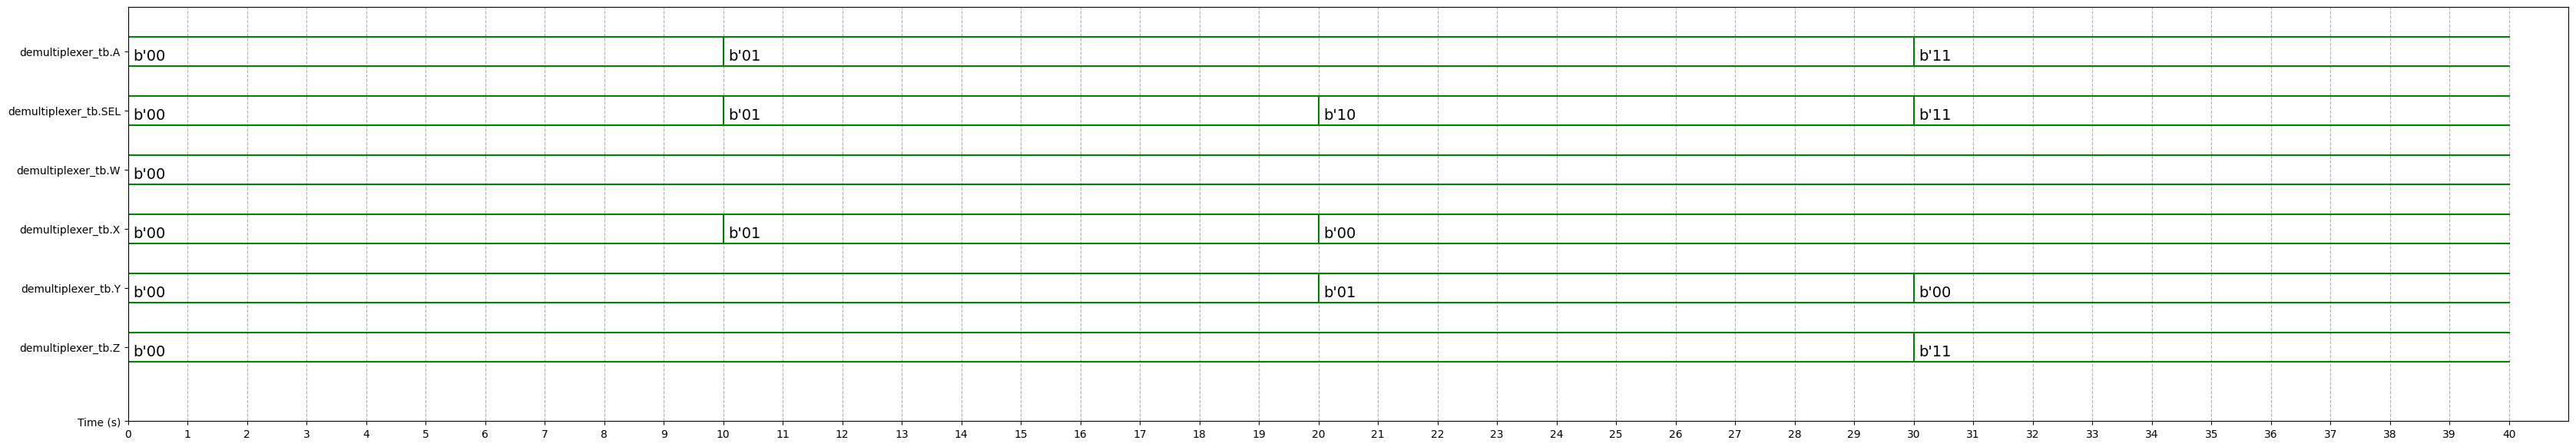

In [ ]:
%%waveform demultiplexer.vcd
sign_list = ['demultiplexer_tb.A', 'demultiplexer_tb.SEL', 'demultiplexer_tb.W', 'demultiplexer_tb.X', 'demultiplexer_tb.Y', 'demultiplexer_tb.Z']
time_begin = 0
time_end = 40
base = 'bin'

5. Here is a demo testbench result for the demultiplexer;

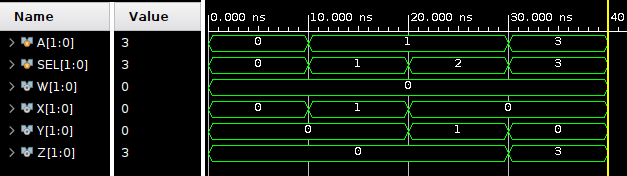

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [70]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module nibbleadd(
    input [7:0]A,
    input [7:0]B,
    input ctrl,
    output [4:0]q
);


//YOUR CODE HERE
  assign q = ctrl ? (A[7:4] + B[7:4]) : (A[3:0] + B[3:0]);
endmodule

//TESTBENCH HERE
module nibbleadd_tb;
    reg [7:0] A, B;
    reg ctrl;
    wire [4:0] q;

    // Instantiate the nibbleadd module
    nibbleadd uut (
        .A(A),
        .B(B),
        .ctrl(ctrl),
        .q(q)
    );

    initial begin
        $dumpfile("nibbleadd.vcd"); // Generate waveform file
        $dumpvars(0, nibbleadd_tb);

        $monitor("Time=%0t | A=%b | B=%b | ctrl=%b | q=%b", $time, A, B, ctrl, q);

        // Test cases
        A = 8'b00001111; B = 8'b00000001; ctrl = 0; #10;  // 15 + 1 = 16
        A = 8'b00001111; B = 8'b00000001; ctrl = 1; #10;  // 0 + 0 = 0
        A = 8'b11110000; B = 8'b00001111; ctrl = 0; #10;  // 0 + 15 = 15
        A = 8'b11110000; B = 8'b00001111; ctrl = 1; #10;  // 15 + 0 = 15
        A = 8'b11111111; B = 8'b11111111; ctrl = 0; #10;  // 15 + 15 = 30
        A = 8'b11111111; B = 8'b11111111; ctrl = 1; #10;  // 15 + 15 = 30

        $finish;
    end
endmodule

VCD info: dumpfile nibbleadd.vcd opened for output.
Time=0 | A=00001111 | B=00000001 | ctrl=0 | q=10000
Time=10 | A=00001111 | B=00000001 | ctrl=1 | q=00000
Time=20 | A=11110000 | B=00001111 | ctrl=0 | q=01111
Time=30 | A=11110000 | B=00001111 | ctrl=1 | q=01111
Time=40 | A=11111111 | B=11111111 | ctrl=0 | q=11110
Time=50 | A=11111111 | B=11111111 | ctrl=1 | q=11110



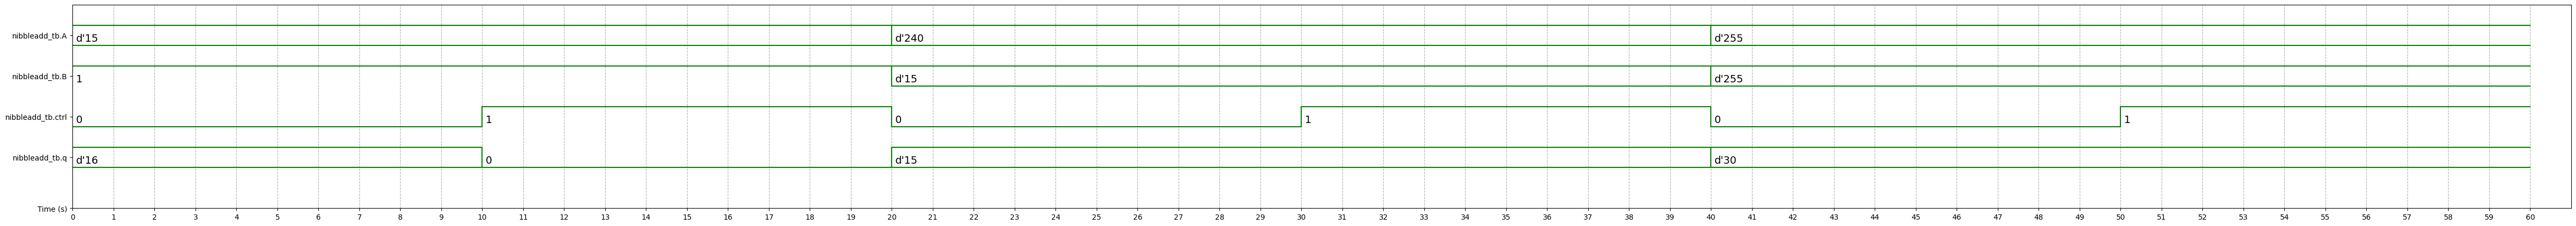

In [73]:
%%waveform nibbleadd.vcd
sign_list = ['nibbleadd_tb.A', 'nibbleadd_tb.B', 'nibbleadd_tb.ctrl', 'nibbleadd_tb.q']
time_begin = 0
time_end = 60
base = 'dec'

5. Here is a demo testbench result for the nibbleadd;

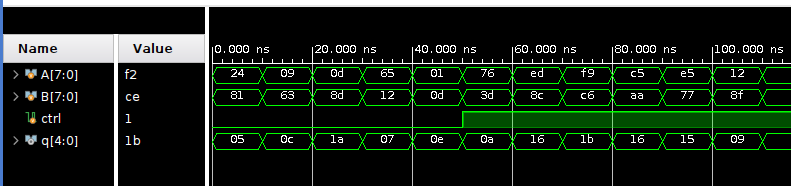

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [74]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module CCTA(
        input [3:0] A,
        input [3:0] B,
        input [3:0] C,
        input rst,
        input ctrl,
        output reg [4:0] q
);

    always @(*) begin
        if (rst)
            q = 5'b00000; // Reset output to 0
        else if (ctrl == 1'b0)
            q = A + B; // Sum when ctrl is 0
        else
            q = A - C; // Difference when ctrl is 1
    end

endmodule

//TESTBENCH
module CCTA_tb;
    reg [3:0] A, B, C;
    reg rst, ctrl;
    wire [4:0] q;

    // Instantiate the module
    CCTA uut (
        .A(A),
        .B(B),
        .C(C),
        .rst(rst),
        .ctrl(ctrl),
        .q(q)
    );

    initial begin
        $dumpfile("CCTA.vcd");
        $dumpvars(0, CCTA_tb);
        $monitor("Time=%0t | A=%b | B=%b | C=%b | rst=%b | ctrl=%b | q=%b", $time, A, B, C, rst, ctrl, q);

        // Test cases
        rst = 1; A = 4'b0000; B = 4'b0000; C = 4'b0000; ctrl = 0; #10; // Reset active
        rst = 0; A = 4'b0011; B = 4'b0001; C = 4'b0001; ctrl = 0; #10; // A + B = 3 + 1 = 4
        rst = 0; A = 4'b0101; B = 4'b0010; C = 4'b0001; ctrl = 1; #10; // A - C = 5 - 1 = 4
        rst = 0; A = 4'b0111; B = 4'b0011; C = 4'b0010; ctrl = 0; #10; // A + B = 7 + 3 = 10
        rst = 0; A = 4'b1000; B = 4'b0011; C = 4'b0100; ctrl = 1; #10; // A - C = 8 - 4 = 4

        $finish;
    end
endmodule

VCD info: dumpfile CCTA.vcd opened for output.
Time=0 | A=0000 | B=0000 | C=0000 | rst=1 | ctrl=0 | q=00000
Time=10 | A=0011 | B=0001 | C=0001 | rst=0 | ctrl=0 | q=00100
Time=20 | A=0101 | B=0010 | C=0001 | rst=0 | ctrl=1 | q=00100
Time=30 | A=0111 | B=0011 | C=0010 | rst=0 | ctrl=0 | q=01010
Time=40 | A=1000 | B=0011 | C=0100 | rst=0 | ctrl=1 | q=00100



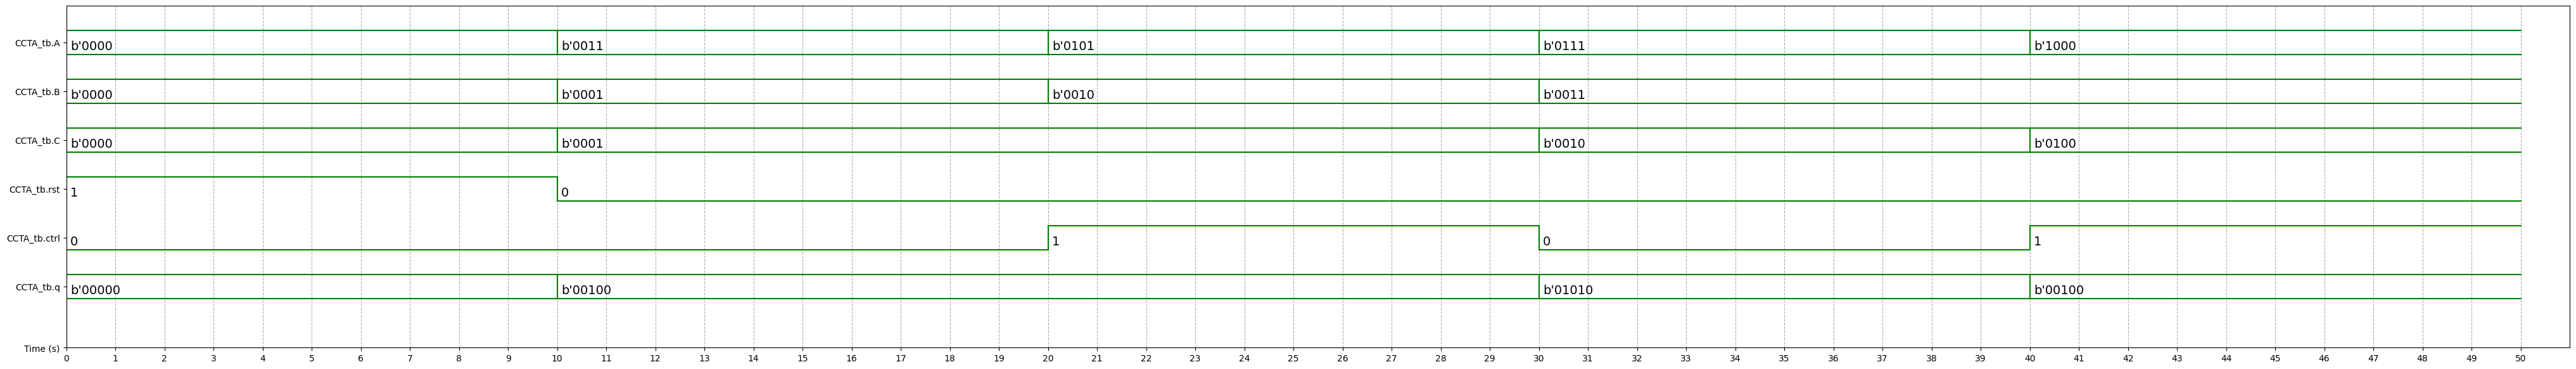

In [75]:
%%waveform CCTA.vcd
sign_list = ['CCTA_tb.A', 'CCTA_tb.B', 'CCTA_tb.C', 'CCTA_tb.rst', 'CCTA_tb.ctrl', 'CCTA_tb.q']
time_begin = 0
time_end = 50
base = 'bin'

5. Here is a demo testbench result for the CCTA;

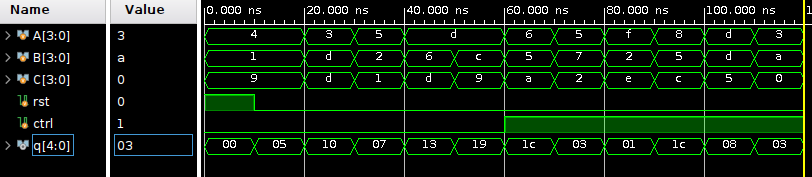